# Wstęp i opis danych

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import kurtosis, skew, ecdf
import scipy
from scipy.stats import t as stu
from scipy.stats import linregress, pearsonr
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [56]:
raw_data = pd.read_csv('Car_Purchasing_Data.csv')

In [57]:
raw_data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [58]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [59]:
raw_data['Annual Salary'] = raw_data['Annual Salary'].astype('int64')

# Analiza jednowymiarowa

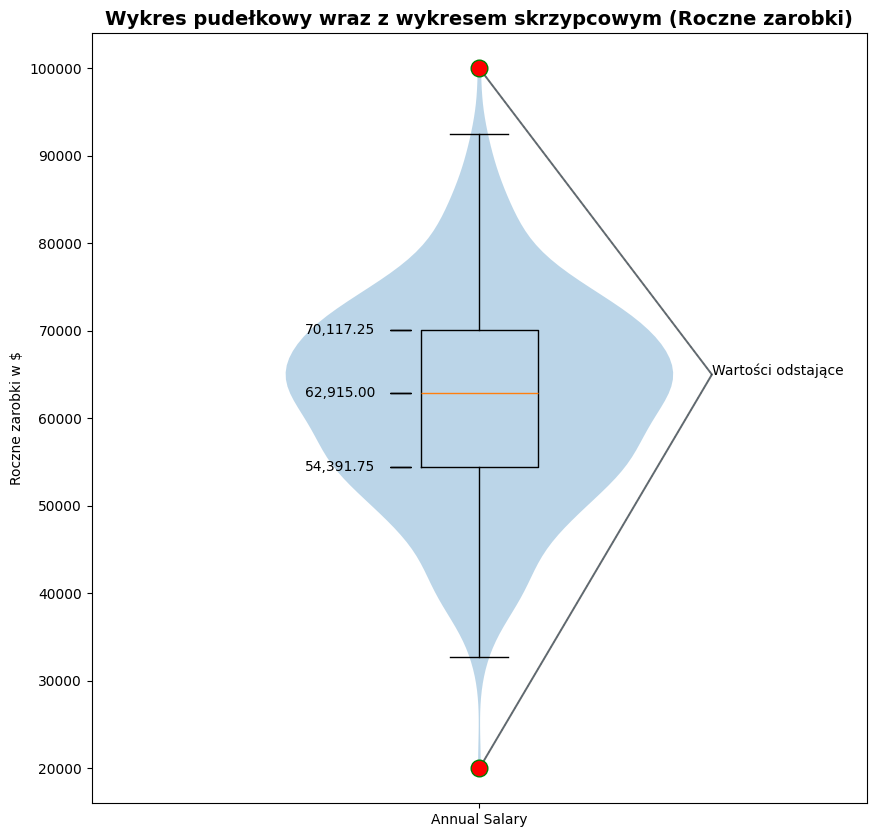

In [60]:
plt.figure(figsize=(10,10))
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(raw_data['Annual Salary'], flierprops=flierprops);
plt.violinplot(raw_data['Annual Salary'], showextrema = False);
plt.title('Wykres pudełkowy wraz z wykresem skrzypcowym (Roczne zarobki)', fontsize=14, fontweight='bold')
plt.ylabel('Roczne zarobki w $')
plt.xticks([1],['Annual Salary'])
plt.text(0.82, np.median(raw_data['Annual Salary']), '62,915.00', horizontalalignment='center',
     verticalalignment='center')
plt.arrow(0.885, np.median(raw_data['Annual Salary']), 0.022, 0)
plt.text(0.82, np.quantile(raw_data['Annual Salary'],0.75), '70,117.25', horizontalalignment='center',
     verticalalignment='center')
plt.arrow(0.885, np.quantile(raw_data['Annual Salary'],0.75), 0.022, 0)

plt.text(0.82, np.quantile(raw_data['Annual Salary'],0.25), '54,391.75', horizontalalignment='center',
     verticalalignment='center')
plt.arrow(0.885, np.quantile(raw_data['Annual Salary'],0.25), 0.022, 0)
plt.text(1.3, 65000, 'Wartości odstające')
plt.arrow(1.3, 65000, -0.3, 35000, alpha = 0.5)
plt.arrow(1.3, 65000, -0.3, -45000, alpha = 0.5)
#plt.savefig('Wykres_pudełkowy_wraz_z_wykresem_skrzypcowym_(Roczne_zarobki)');
plt.show()

In [61]:
kurtosis(raw_data['Annual Salary'], fisher = False)

3.08311276984045

In [62]:
skew(raw_data['Annual Salary'])

-0.08721192379472553

In [63]:
np.mean(raw_data['Annual Salary'])

62126.748

In [64]:
np.std(raw_data['Annual Salary'])

11691.684596861824

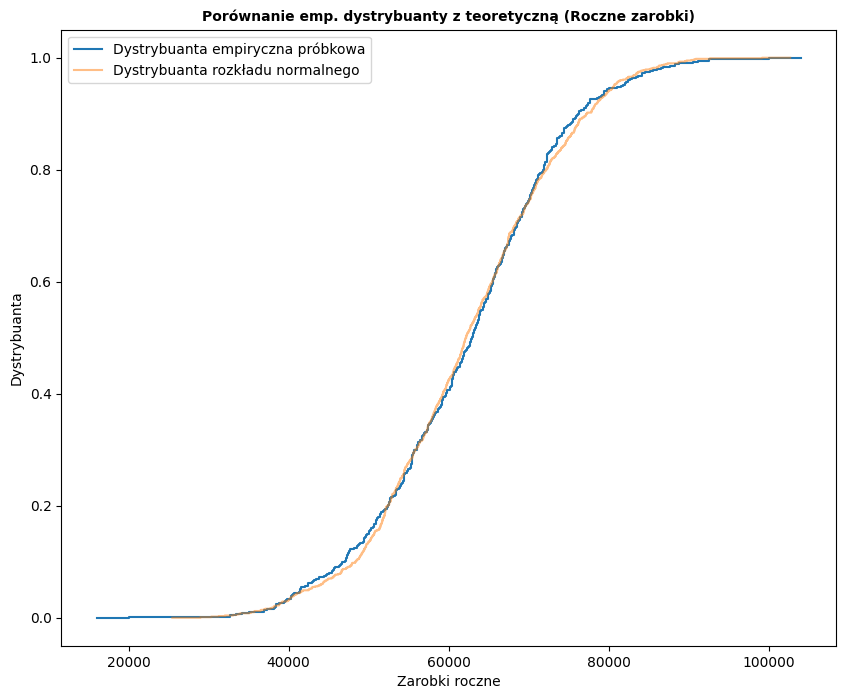

In [65]:
res = ecdf(raw_data['Annual Salary'])
norm = ecdf(np.random.normal(loc=np.mean(raw_data['Annual Salary']), scale=np.std(raw_data['Annual Salary']), size=1000))
plt.figure(figsize=(10,8))
ax = plt.subplot()
res.cdf.plot(ax, label = 'Dystrybuanta empiryczna próbkowa')
norm.cdf.plot(ax, alpha=0.5, label='Dystrybuanta rozkładu normalnego')
ax.set_xlabel('Zarobki roczne')
ax.set_ylabel('Dystrybuanta')
ax.set_title('Porównanie emp. dystrybuanty z teoretyczną (Roczne zarobki)', fontsize=10, fontweight='bold')
plt.legend()
#plt.savefig('Porównanie_emp1')
plt.show()

Zmienna zależna

In [66]:
raw_data['Car Purchase Amount'] = raw_data['Car Purchase Amount'].astype('int64')

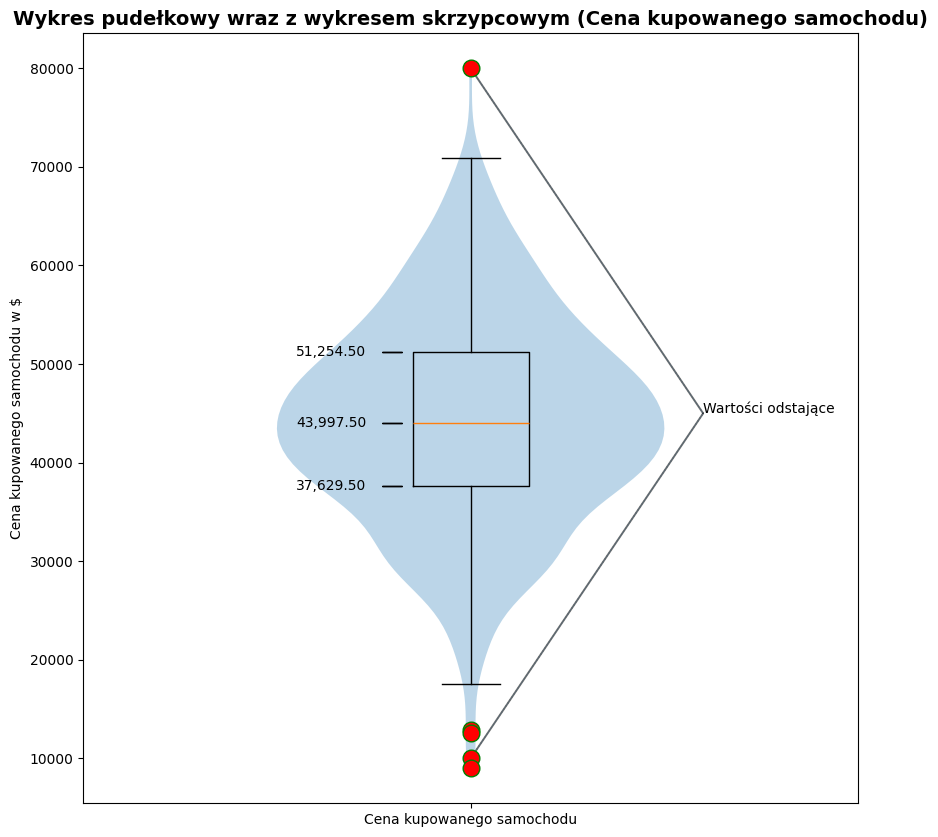

In [67]:
plt.figure(figsize=(10,10))
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')
plt.boxplot(raw_data['Car Purchase Amount'], flierprops=flierprops);
plt.violinplot(raw_data['Car Purchase Amount'], showextrema = False);
plt.title('Wykres pudełkowy wraz z wykresem skrzypcowym (Cena kupowanego samochodu)', fontsize=14, fontweight='bold')
plt.ylabel('Cena kupowanego samochodu w $')
plt.xticks([1],['Cena kupowanego samochodu'])
plt.text(0.82, np.median(raw_data['Car Purchase Amount']), '43,997.50', horizontalalignment='center',
     verticalalignment='center')
plt.arrow(0.885, np.median(raw_data['Car Purchase Amount']), 0.022, 0)
plt.text(0.82, np.quantile(raw_data['Car Purchase Amount'],0.75), '51,254.50', horizontalalignment='center',
     verticalalignment='center')
plt.arrow(0.885, np.quantile(raw_data['Car Purchase Amount'],0.75), 0.022, 0)

plt.text(0.82, np.quantile(raw_data['Car Purchase Amount'],0.25), '37,629.50', horizontalalignment='center',
     verticalalignment='center')
plt.arrow(0.885, np.quantile(raw_data['Car Purchase Amount'],0.25), 0.022, 0)
plt.text(1.3, 45000, 'Wartości odstające')
plt.arrow(1.3, 45000, -0.3, 35000, alpha = 0.5)
plt.arrow(1.3, 45000, -0.3, -35000, alpha = 0.5)
#plt.savefig('Wykres_pudełkowy_wraz_z_wykresem_skrzypcowym_(Cena_kupowanego_samochodu)');

In [68]:
np.median(raw_data['Car Purchase Amount'])

43997.5

In [69]:
np.quantile(raw_data['Car Purchase Amount'], 0.25)

37629.5

In [70]:
np.quantile(raw_data['Car Purchase Amount'], 0.75)

51254.5

In [71]:
kurtosis(raw_data['Car Purchase Amount'], fisher = False)

3.212997103573369

In [72]:
skew(raw_data['Car Purchase Amount'])

-0.03069211796245812

In [73]:
np.mean(raw_data['Car Purchase Amount'])

44209.292

In [74]:
np.std(raw_data['Car Purchase Amount'])

10762.404109246967

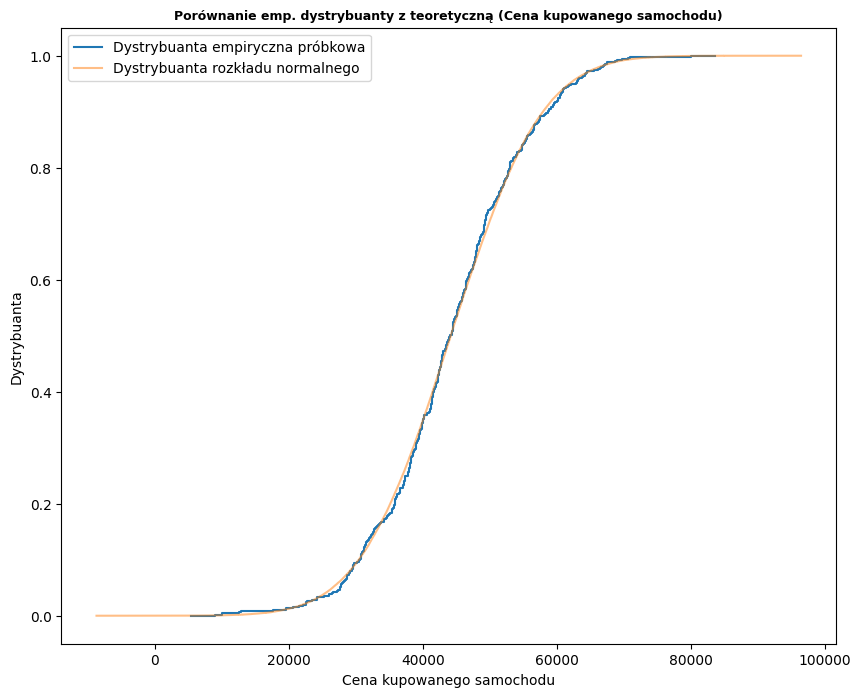

In [124]:
res = ecdf(raw_data['Car Purchase Amount'])
norm = ecdf(np.random.normal(loc=np.mean(raw_data['Car Purchase Amount']), scale=np.std(raw_data['Car Purchase Amount']), size=100000))
plt.figure(figsize=(10,8))
ax = plt.subplot()
res.cdf.plot(ax, label = 'Dystrybuanta empiryczna próbkowa')
norm.cdf.plot(ax, alpha=0.5, label='Dystrybuanta rozkładu normalnego')
ax.set_xlabel('Cena kupowanego samochodu')
ax.set_ylabel('Dystrybuanta')
ax.set_title('Porównanie emp. dystrybuanty z teoretyczną (Cena kupowanego samochodu)', fontsize=9, fontweight='bold')
plt.legend()
plt.savefig('Porównanie_emp2')
plt.show()

# Analiza zależności pomiędzy zmienną objaśniającą a zmienną objaśnianą

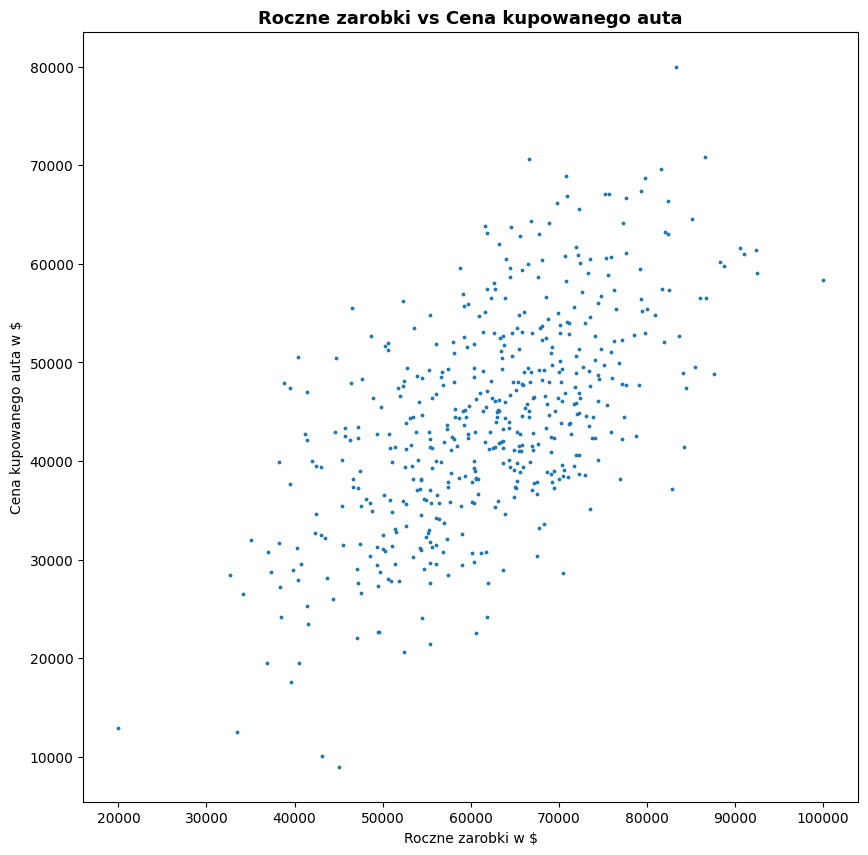

In [76]:
plt.figure(figsize=(10,10))
plt.scatter(raw_data['Annual Salary'].tolist(), raw_data['Car Purchase Amount'].tolist(), s = 3)
plt.title('Roczne zarobki vs Cena kupowanego auta', fontsize=13, fontweight='bold')
plt.xlabel('Roczne zarobki w $')
plt.ylabel('Cena kupowanego auta w $')
#plt.savefig('Wykres razproszenia')
plt.show()

In [77]:
X_train, X_test, y_train, y_test = train_test_split(raw_data['Annual Salary'].tolist(), raw_data['Car Purchase Amount'].tolist(), test_size=0.1, random_state=42)

In [78]:
def reglin(X, Y):
    X_mean = np.array(X).mean()
    Y_mean = np.array(Y).mean()

    sum1 = 0
    sum2 = 0

    for i in range(len(X)):
        sum1 += X[i] * (Y[i] - Y_mean)
        sum2 += (X[i] - X_mean) ** 2

    beta1 = sum1 / sum2
    beta0 = Y_mean - beta1 * X_mean
    return [beta1, beta0]

In [79]:
beta1, beta0 = reglin(X_train, y_train)

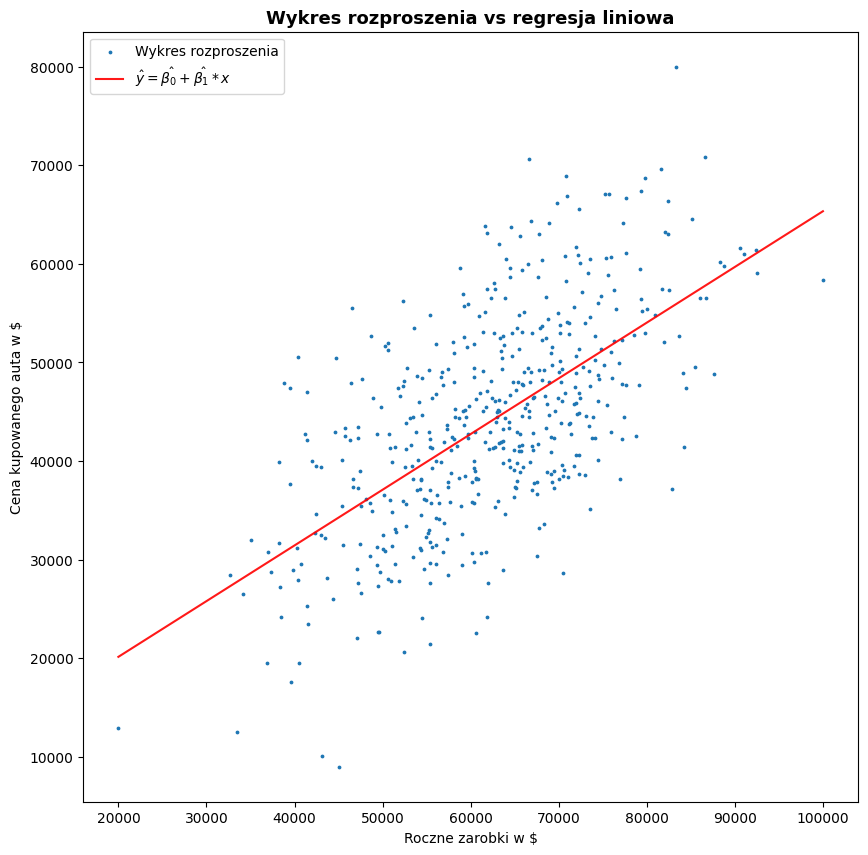

In [80]:
first_dot = min(raw_data['Annual Salary'].tolist())
last_dot = max(raw_data['Annual Salary'].tolist())
plt.figure(figsize=(10,10))
plt.scatter(raw_data['Annual Salary'].tolist(), raw_data['Car Purchase Amount'].tolist(), s = 3, label='Wykres rozproszenia')
plt.plot([first_dot, last_dot], [beta0 + beta1*first_dot, beta0 + beta1*last_dot], alpha = 0.9, color = 'r', label=r'$\hat{y} = \hat{\beta_0} + \hat{\beta_1} * x$')
plt.title('Wykres rozproszenia vs regresja liniowa', fontsize=13, fontweight='bold')
plt.xlabel('Roczne zarobki w $')
plt.ylabel('Cena kupowanego auta w $')
plt.legend()
plt.show()
#plt.savefig('Wykres razproszenia i regresja liniowa')


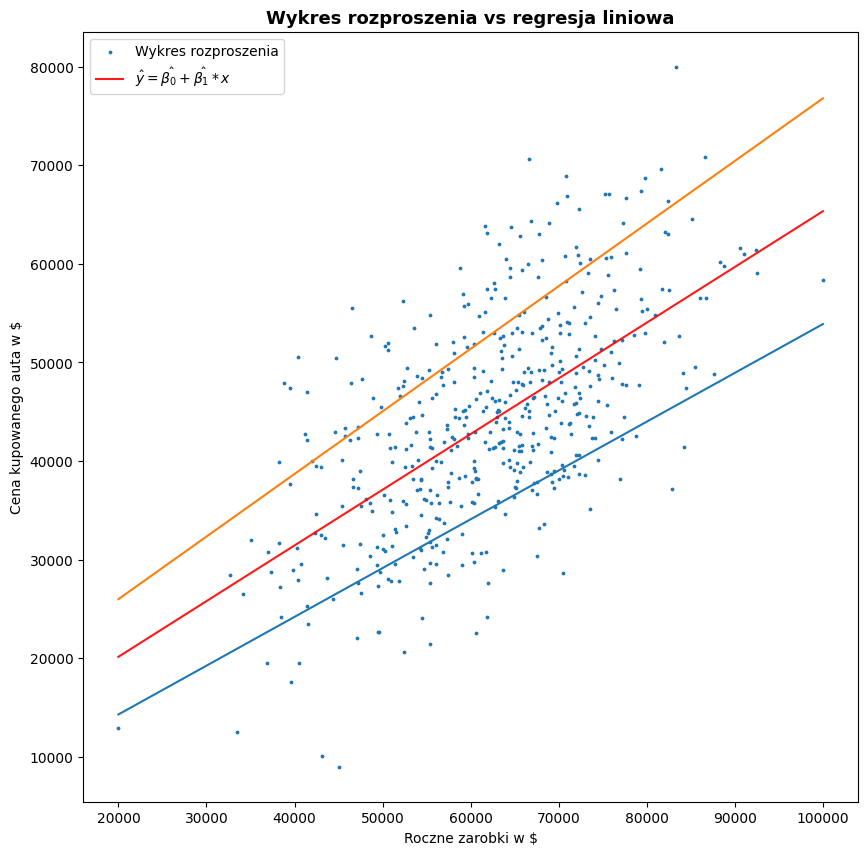

In [92]:
first_dot = min(raw_data['Annual Salary'].tolist())
last_dot = max(raw_data['Annual Salary'].tolist())
plt.figure(figsize=(10,10))
plt.scatter(raw_data['Annual Salary'].tolist(), raw_data['Car Purchase Amount'].tolist(), s = 3, label='Wykres rozproszenia')
plt.plot([first_dot, last_dot], [beta0 + beta1*first_dot, beta0 + beta1*last_dot], alpha = 0.9, color = 'r', label=r'$\hat{y} = \hat{\beta_0} + \hat{\beta_1} * x$')
plt.plot([first_dot, last_dot], [4399 + 0.495*first_dot, 4399 + 0.495*last_dot])
plt.plot([first_dot, last_dot], [13293 + 0.635*first_dot, 13293 + 0.635*last_dot])
plt.title('Wykres rozproszenia vs regresja liniowa', fontsize=13, fontweight='bold')
plt.xlabel('Roczne zarobki w $')
plt.ylabel('Cena kupowanego auta w $')
plt.legend()
plt.show()

In [81]:
#estymacja przedziałowa
n = 400
alpha = 0.05
t= stu.ppf(1-alpha/2, n-2)
beta_0_emp = beta0
beta_1_emp = beta1
y_emp = beta_0_emp + beta_1_emp*np.array(X_train)
s = np.sqrt(1/(n-2)*sum((y_emp-np.array(y_train))**2))
x_mean = np.mean(np.array(X_train))
x_sum = sum((np.array(X_train)-x_mean)**2)
beta_0_con = t*s*np.sqrt(1/n+(x_mean**2)/(x_sum))
beta_1_con = t*s/np.sqrt(x_sum)
print('beta_0 emp:', beta_0_emp)
print('beta_0 left:', beta_0_emp - beta_0_con)
print('beta_0 right:', beta_0_emp + beta_0_con)
print('beta_1 emp:', beta_1_emp)
print('beta_1 left:', beta_1_emp - beta_1_con)
print('beta_1 right:', beta_1_emp + beta_1_con)


beta_0 emp: 8845.899158242551
beta_0 left: 4399.085547678631
beta_0 right: 13292.712768806472
beta_1 emp: 0.5649590660395962
beta_1 left: 0.49470857550996367
beta_1 right: 0.6352095565692288


In [82]:
r2_score(y_train, beta_0_emp + beta_1_emp*np.array(X_train))

0.38576797505079563

# Jakość modelu

In [83]:
pearsonr(y_train, beta_0_emp + beta_1_emp*np.array(X_train))

PearsonRResult(statistic=0.6211022259264538, pvalue=2.3326114280263654e-49)

# Predykcja dla danych testowych

In [42]:
y_pred=beta0+beta1*np.array(X_test)
res=y_test-y_pred

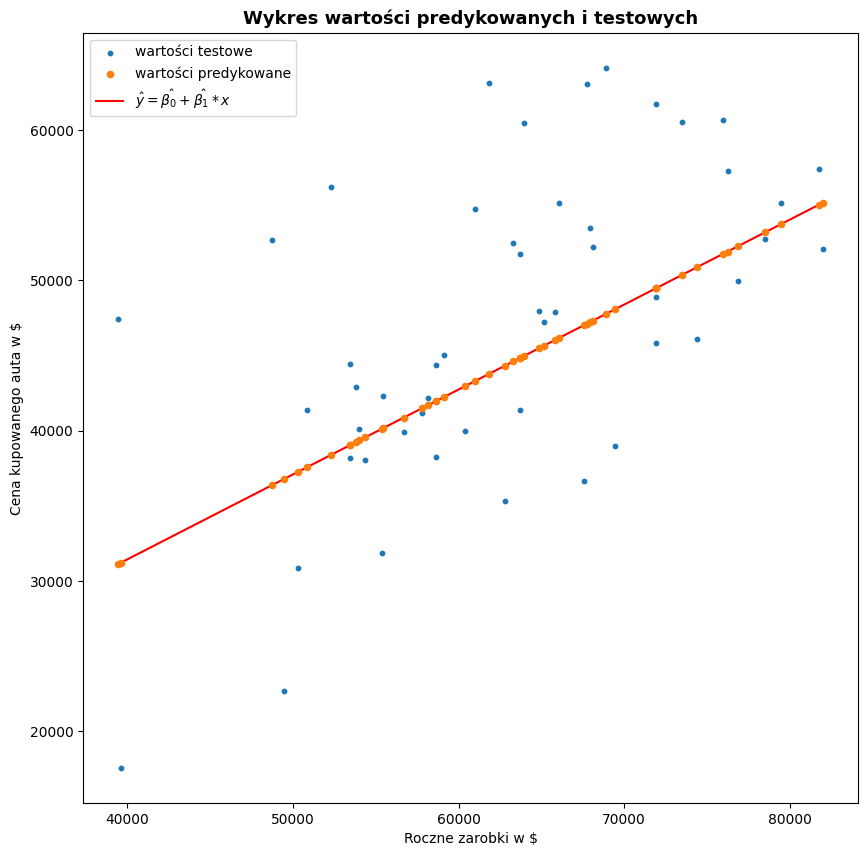

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(X_test,y_test,zorder=2,label="wartości testowe",s=10)
plt.scatter(X_test,y_pred,zorder=3,label='wartości predykowane',s=20)
plt.plot([min(X_test), max(X_test)], [beta0 + beta1*min(X_test), beta0 + beta1*max(X_test)],color="red",zorder=1, label=r'$\hat{y} = \hat{\beta_0} + \hat{\beta_1} * x$')
plt.title('Wykres wartości predykowanych i testowych', fontsize=13, fontweight='bold')
plt.xlabel('Roczne zarobki w $')
plt.ylabel('Cena kupowanego auta w $')
plt.legend()
#plt.savefig('Wykres_wartosci_predykowanej_i_testowej');
plt.show()

In [90]:
np.var(raw_data['Car Purchase Amount'])

115829342.21073599

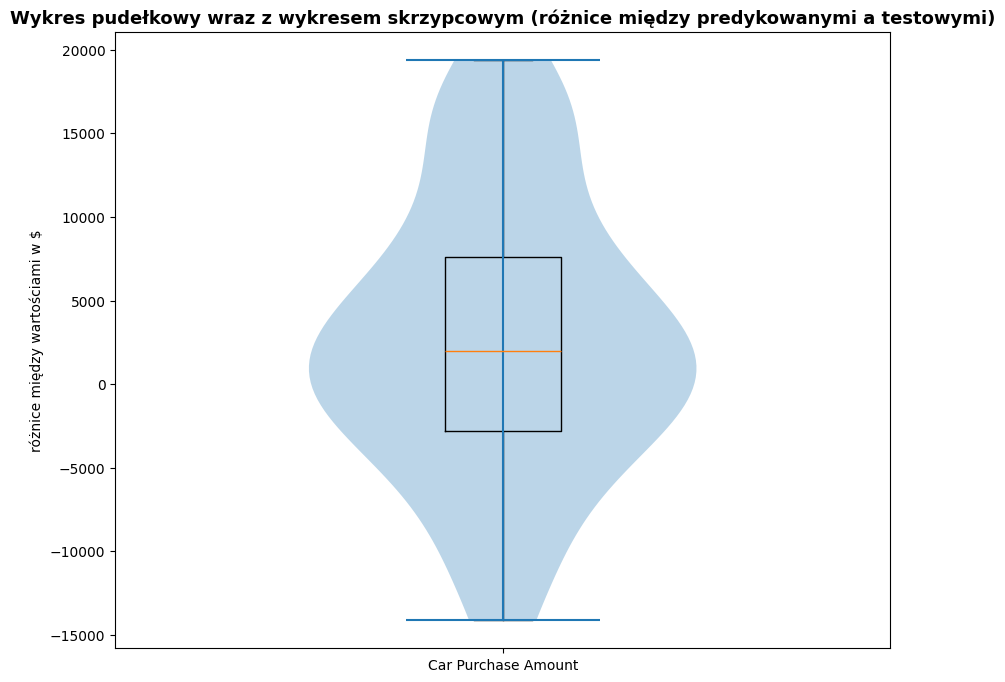

In [44]:
plt.figure(figsize=(10,8))
plt.boxplot(res)
plt.violinplot(res)
plt.title('Wykres pudełkowy wraz z wykresem skrzypcowym (różnice między predykowanymi a testowymi)', fontsize=13, fontweight='bold')
plt.ylabel('różnice między wartościami w $')
plt.xticks([1],['Car Purchase Amount'])
#plt.savefig('Wykres_pudelkowy_roznice')
plt.show()

In [45]:
mean_squared_error(y_pred,y_test)

73737323.25758804

In [46]:
mean_absolute_error(y_pred,y_test)

6630.428762245374

# Analiza residuów

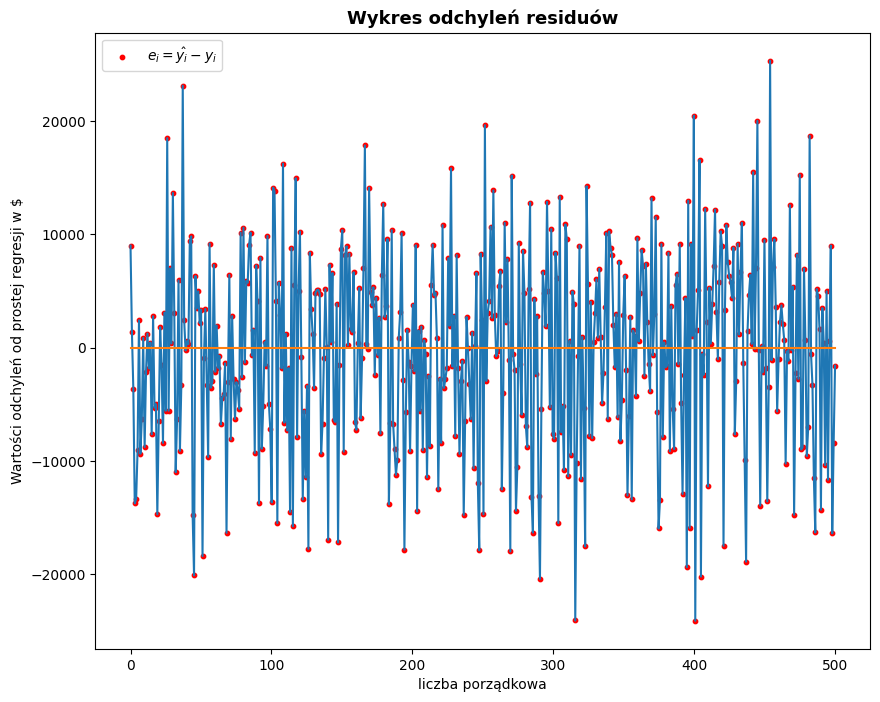

In [47]:
res_data = (beta0 + beta1*np.array(raw_data['Annual Salary']))-raw_data['Car Purchase Amount'].tolist()
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0,500,500),res_data)
plt.scatter(np.linspace(0,500,500),res_data,s=10,color="red",label=r'$e_i = \hat{y_i} - y_i$')
plt.plot([0,500],[0,0])
plt.title('Wykres odchyleń residuów', fontsize=13, fontweight='bold')
plt.xlabel('liczba porządkowa')
plt.ylabel('Wartości odchyleń od prostej regresji w $')
plt.legend()
#plt.savefig('Wykres_residuow')
plt.show()


In [48]:
np.mean(res_data)

-264.3233156000958

Nie wyszła średnia odchyleń równa zero, ale patrząc na wartości danych bliskie dziesiątek tysięcy jest to wynik bliski zeru

stała wariancja

In [49]:
# Create X and y dataframes
X = raw_data[["Annual Salary"]]
y = raw_data[["Car Purchase Amount"]]

# Add constant according to statsmodels documentation
X_sm = sm.add_constant(X)

# Create model, fit, and print results
mod_sm = sm.OLS(y,X_sm)
res_sm = mod_sm.fit()
res_sm.summary()
test_values = sm.stats.diagnostic.het_white(res_sm.resid, res_sm.model.exog)

In [50]:
test_values

(1.1082862607483812,
 0.5745643770895452,
 0.5520419125259548,
 0.5761255694608645)

Test White’a – test pozwalający zbadać, czy wariancja reszt w modelu jest stała, tzn. czy składnik losowy jest homoskedastyczny

p-wartość wyszła 0.57 więc nie ma potrzeby odrzycania hipotezy zerowej mówiącej o stałej wariancji reszt modelu

niezależność błędów

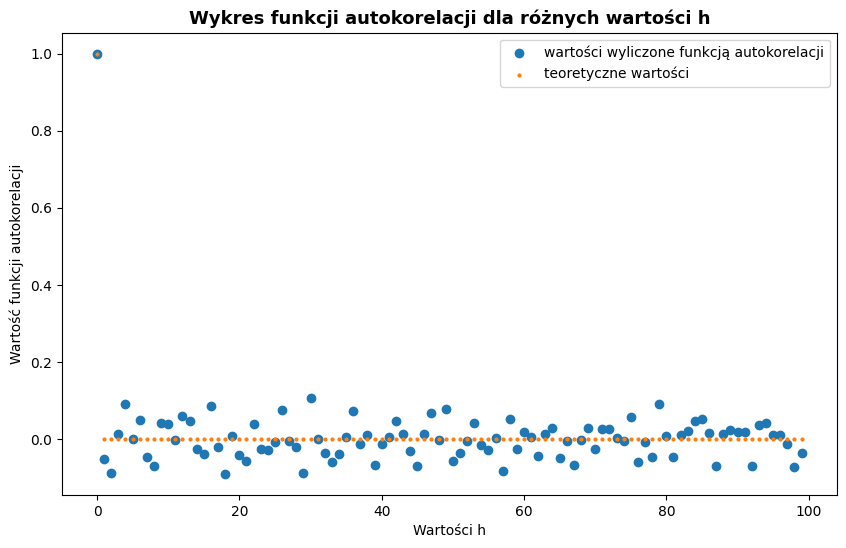

In [51]:
def autokowariancja(dane,h):
    c=0
    me=np.mean(dane)
    for i in range(1,len(dane)-h+1):
        c+=(dane[i-1]-me)*(dane[i+h-1]-me)
    return c/len(dane)
def autocor(dane,h):
    return autokowariancja(dane,h)/autokowariancja(dane,0)
for n in [1000]:
    g1=list()
    hs=np.arange(0,100,1)
    for h in hs:
        g1.append(autocor(res_data,h))
plt.figure(figsize=(10,6))       
plt.scatter(hs,g1, label="wartości wyliczone funkcją autokorelacji")
plt.scatter(hs,[1]+[0]*(len(hs)-1),s=4,label="teoretyczne wartości")
plt.title('Wykres funkcji autokorelacji dla różnych wartości h', fontsize=13, fontweight='bold')
plt.xlabel('Wartości h')
plt.ylabel('Wartość funkcji autokorelacji')
plt.legend()
plt.savefig('Wykres_autokorelacji')
plt.show()

Funkcja autokorelacji dla naszych danych przyjmuje 1 dla h=0, oraz dla reszty danych wartości bliskie 0, świadcząd o niezależności residuów

Dopasowanie do rozkładu normalnego

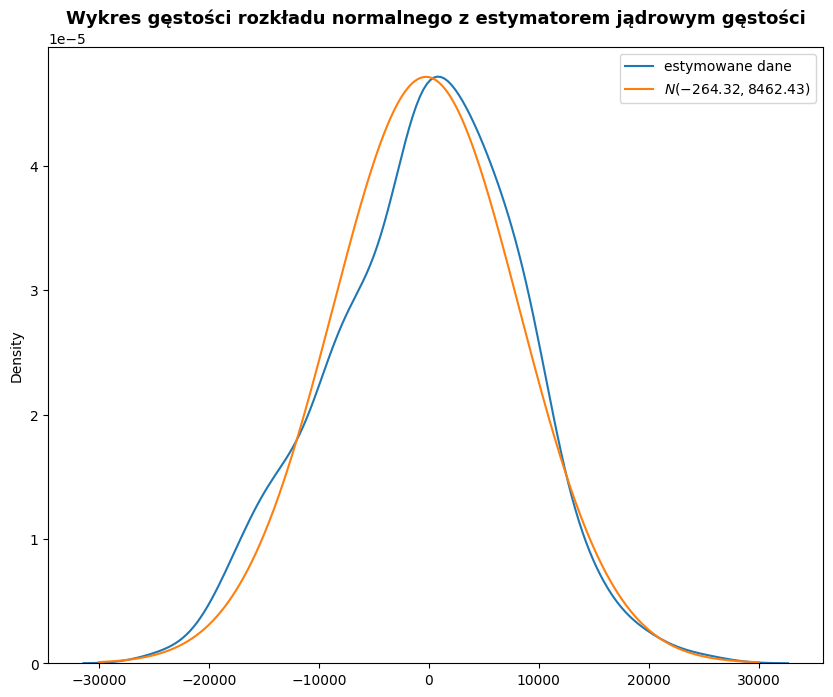

In [52]:
plt.figure(figsize=(10,8))
sns.kdeplot(res_data,label="estymowane dane")
plt.plot(np.linspace(-30000,30000,10000),scipy.stats.norm.pdf(np.linspace(-30000,30000,10000),np.mean(res_data),np.sqrt(np.var(res_data))),label=f'$N({np.mean(res_data):.2f},{np.sqrt(np.var(res_data)):.2f})$')
plt.title('Wykres gęstości rozkładu normalnego z estymatorem jądrowym gęstości', fontsize=13, fontweight='bold')
plt.legend()
plt.savefig('Wykres_gestosci')
plt.show()

Testy na sprawdzenie rozkładu

In [53]:
scipy.stats.kstest(res_data,np.random.normal(np.mean(res_data),np.sqrt(np.var(res_data)),500))

KstestResult(statistic=0.072, pvalue=0.14973189477810775, statistic_location=167.325686037305, statistic_sign=-1)

In [54]:
scipy.stats.jarque_bera(res_data)

SignificanceResult(statistic=2.882193798991261, pvalue=0.23666801522539913)

In [123]:
scipy.stats.kstest(raw_data['Annual Salary'],np.random.normal(np.mean(raw_data['Annual Salary']),np.sqrt(np.var(raw_data['Annual Salary'])),500))

KstestResult(statistic=0.048, pvalue=0.6126241113875229, statistic_location=60295.52062916215, statistic_sign=-1)

In [101]:
scipy.stats.kstest(raw_data['Car Purchase Amount'],np.random.normal(np.mean(raw_data['Car Purchase Amount']),np.sqrt(np.var(raw_data['Car Purchase Amount'])),500))

KstestResult(statistic=0.044, pvalue=0.7189191850204419, statistic_location=45115.0, statistic_sign=1)